# Proximity of PMIP3 traces to LMR ensembles

Let's apply the notion of plume distance to PMIP3 runs and the offline LMR. This reproduces Table 1 from the paper (minus the bolding of compatible values, which was done by hand).

In [1]:
import pandas as pd
import pens
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyleoclim as pyleo
plt.style.use('default')
pens.set_style()

## LMR offline

Any probablistic estimate of a time-varying series results in not just one "best" estimate, but a distribution whose characteristics (e.g. location, scale, symmetry) are time-dependent. One example of this is the output of an Ensemble Kalman Filter like the [Last Millennium Reanalysis, v2.1](https://doi.org/10.5194/cp-15-1251-2019). Let us load the data and plot their distribution over time:

(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'LMR v2.1'}, xlabel='time', ylabel='GMST [°C]'>)

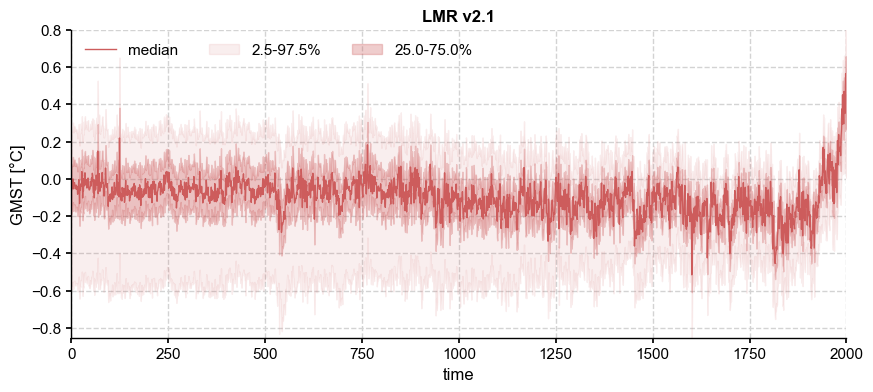

In [2]:
path = '../data/gmt_MCruns_ensemble_full_LMRv2.1.nc'
ens_off = pens.EnsembleTS().load_nc(path, var='gmt')
ens_off.label = 'LMR v2.1'
ens_off.value_name = 'GMST'
ens_off.value_unit = '\N{DEGREE SIGN}C'
ens_off.plot_qs()

## LMRonline

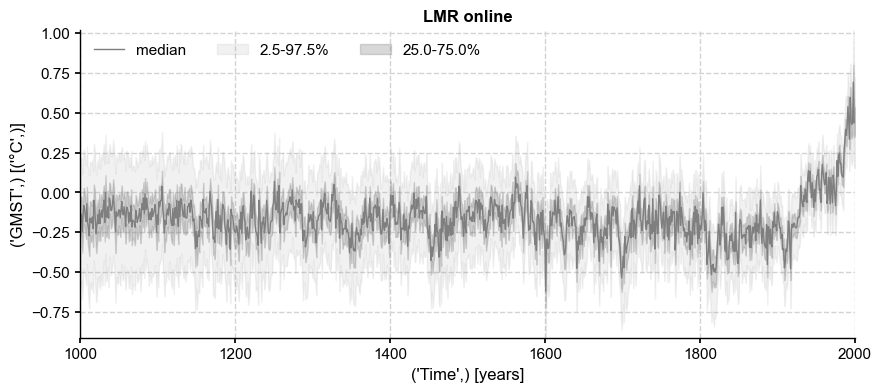

In [3]:
ens_on = pens.EnsembleTS().load_nc('../data/gmt_MCruns_ensemble_full_LMRonline.nc', var='glob_mean', time_name='year')
ens_on.label = 'LMR online'
ens_on.time_unit = 'years'
ens_on.time_name='Time',            # optional metadata: the name of the time axis
ens_on.value_name='GMST',     # optional metadata: the name of the value axis
ens_on.value_unit='\N{DEGREE SIGN}C',      

fig, ax = ens_on.plot_qs(color = 'tab:gray')

Subsample to align to LMR offline

In [4]:
ens_o2000 = ens_on.subsample(nsamples=ens_off.nEns)

## PMIP3 simulations
Let us load and plot the data first:

In [5]:
df = pd.read_table('../data/PMIP3_GMST.txt')
# create a new pandas.DataFrame to store the processed data
dfn = df.copy()

# remove the data columns for CESM and GISS ensemble members
for i in range(10):
    dfn = dfn.drop([f'CESM_member_{i+1}'], axis=1)
    
dfn = dfn.drop(['GISS-E2-R_r1i1p127.1'], axis=1)
dfn = dfn.drop(['GISS-E2-R_r1i1p127'], axis=1)
dfn = dfn.drop(['GISS-E2-R_r1i1p121'], axis=1)

# calculate the ensemble mean for CESM and GISS, and add the results into the table
dfn['CESM'] = df[[
    'CESM_member_1',
    'CESM_member_2',
    'CESM_member_3',
    'CESM_member_4',
    'CESM_member_5',
    'CESM_member_6',
    'CESM_member_7',
    'CESM_member_8',
    'CESM_member_9',
    'CESM_member_10',
]].mean(axis=1)

dfn['GISS'] = df[[
    'GISS-E2-R_r1i1p127.1',   
    'GISS-E2-R_r1i1p127',
    'GISS-E2-R_r1i1p121',
]].mean(axis=1)

# display the processed data
dfn

,Year,bcc_csm1_1,CCSM4,FGOALS_gl,FGOALS_s2,IPSL_CM5A_LR,MPI_ESM_P,CSIRO,HadCM3,CESM,GISS
0,850,-0.570693,-0.431830,NaN,-0.620995,-0.475963,-0.170230,NaN,-0.620517,0.049553,0.127429
1,851,-0.698903,-0.411177,NaN,-0.753160,-0.742970,-0.303124,-0.398695,-0.553043,0.193858,0.138796
2,852,-0.575440,-0.404802,NaN,-0.743508,-0.758939,-0.422623,-0.406343,-0.560791,0.185033,0.098170
3,853,-0.724757,-0.552719,NaN,-0.869331,-0.746460,-0.335177,-0.353557,-0.438949,0.120470,-0.054552
4,854,-0.724328,-0.734938,NaN,-0.826238,-0.684093,-0.650792,-0.416140,-0.812194,-0.081349,-0.407169
...,...,...,...,...,...,...,...,...,...,...,...
1161,2011,1.013544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1162,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1163,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1164,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


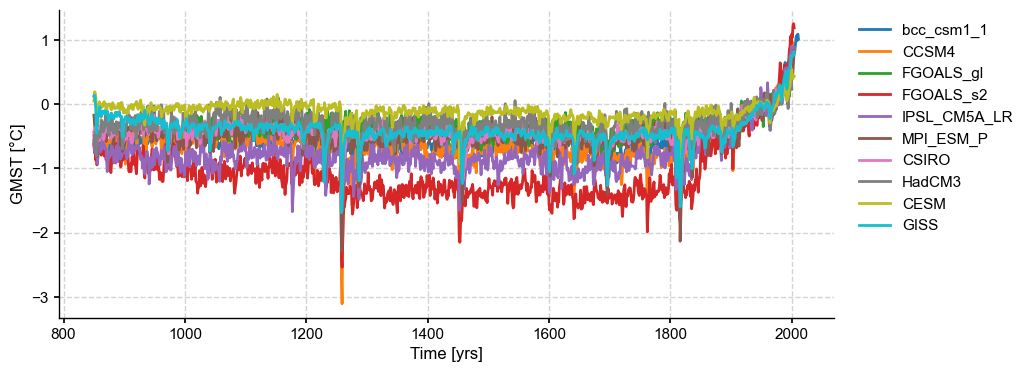

In [6]:
# store each pyleoclim.Series() object into a dictionary and plot
ts_dict = {}
for name in dfn.columns[1:]:
    ts_dict[name] = pyleo.Series(
        time=dfn['Year'].values,  # the time axis
        value=dfn[name].values,   # the value axis
        label=name,                  # optional metadata: the nickname of the series
        time_name='Time',            # optional metadata: the name of the time axis
        time_unit='yrs',             # optional metadata: the unit of the time axis
        value_name='GMST',     # optional metadata: the name of the value axis
        value_unit='\N{DEGREE SIGN}C',              # optional metadata: the unit of the value axis
        verbose = False,
    )

ts_list = [v for k, v in ts_dict.items()]  # a pythonic way to convert the pyleo.Series items in the dictionary to a list
ms_pmip = pyleo.MultipleSeries(ts_list)
fig, ax = ms_pmip.plot(lgd_kwargs={
        'bbox_to_anchor': (1.25, 1),  # move the legend to the right side
    })

(1000.0, 2000.0)

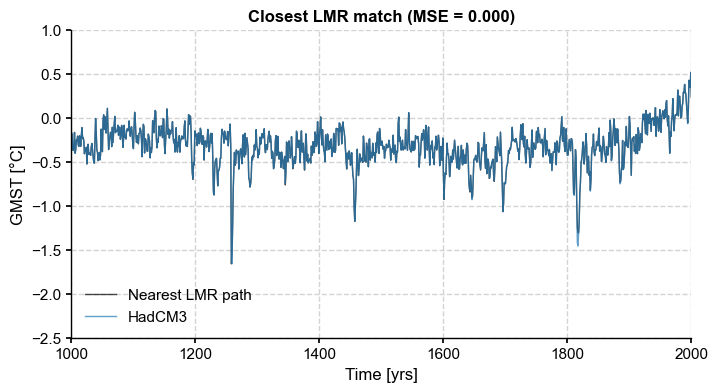

In [7]:
common_time = [1000, 2000]
lmr_slice = ens_off.slice(common_time)
HadCM3 = ts_list[7].slice(common_time)
CCSM4 = ts_list[1].slice(common_time)
path_nearest = lmr_slice.sample_nearest(HadCM3.value, metric='MSE')
dist = path_nearest.distance  # extract distance metric
fig, ax = path_nearest.plot(figsize=(8,4),
    title='Closest LMR match (MSE = {:4.3f})'.format(dist),
    color='k', label='Nearest LMR path', alpha=0.7,
)

HadCM3.plot(ax=ax, ylim=(-2.5, 1), alpha=0.7, linewidth=1)
ax.legend(loc='lower left', ncol=1)
ax.set_xlim(common_time)
#fig.savefig('../figures/closest_match_HadCM3.pdf')

In [8]:
ts_match = path_nearest.to_pyleo(verbose=False,auto_time_params=True)
corr = ts_match.correlation(HadCM3)
print(corr)

Evaluating association on surrogate pairs: 100%|██████████| 1000/1000 [00:00<00:00, 3884.73it/s]

  correlation  p-value    signif. (α: 0.05)
-------------  ---------  -------------------
     0.999332  < 1e-6     True



We were indeed able to find a trajectory that highly correlates with the target ($\hat{\rho} > 0.99$). The question is: how *likely* is that trajectory under the ensemble's distribution? Let's apply the notion of plume distance:

<Axes: xlabel='Time [yrs]', ylabel='GMST [°C]'>

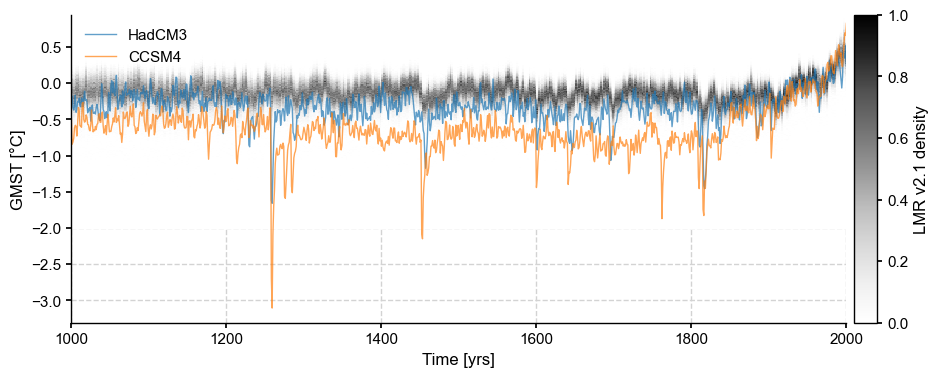

In [9]:
fig, ax = lmr_slice.line_density()
HadCM3.plot(alpha=0.7, linewidth=1, color='tab:blue',ax=ax)
CCSM4.plot(alpha=0.7, linewidth=1, color='tab:orange',ax=ax)

In [16]:
models = ['HadCM3', 'CCSM4']
dist = np.zeros((len(models)))
for m, mdl in enumerate(models):
    dist[m] = lmr_slice.plume_distance(y=eval(mdl).value,max_dist=1)
np.diff(dist)[0]

ValueError: setting an array element with a sequence.

In [29]:
models = ['HadCM3', 'CCSM4']
dist = np.zeros((len(models)))
for m, mdl in enumerate(models):
    dist[m] = lmr_slice.plume_distance(y=eval(mdl).value,max_dist=1)[0]
np.diff(dist)[0]

0.29834614566932516

This metric suggests that the CCSM4 simulation is roughly 0.3C further from the LMR simulation than HadCM3, consistent with the visual impression. Does this change quantitatively when we resample? 

## Resampled trajectories
For this, we need proper ensemble trajectories, so we resample the LMR offline ensemble in 3 ways:
- an autoregressive model (AR(2)) fit to the online LMR ensemble
- fractional Gaussian noise (fGn)
- power-law behavior

### AR model parameters

The AR(p) model for the mean writes $X_t = \sum_{\ell=1}^p \phi_\ell X_{t-\ell} + \epsilon_t$, where  $\epsilon$ is Gaussian, i.i.d. with variance $\sigma^2$ and mean zero, and $\phi_\ell$ is the autocorrelation at lag $\ell= 1, \dots, p$. We load the parameters fitted to LMRonline (Perkins & Hakim, 2021) with [statsmodel](https://www.statsmodels.org/dev/generated/statsmodels.tsa.ar_model.AutoReg.fit.html#statsmodels.tsa.ar_model.AutoReg.fit):

In [20]:
ar_params = pd.read_csv('../data/LMRonline_ARfit.csv',index_col=0)
ar_params.head()

,φ0,φ1,φ2,φ3,φ4,var
ens member,,,,,,
0,0.051950,0.459652,0.167199,0.046081,0.073954,0.582262
1,-0.002925,0.337561,0.320492,0.065557,0.094333,0.495418
2,-0.040660,0.610942,0.088920,0.040907,0.061450,0.450393
3,0.063021,0.365478,0.277480,-0.030457,0.066657,0.671342
4,-0.166564,0.269797,0.324987,0.150546,-0.015932,0.626581


In [21]:
phi_m = ar_params.mean().to_numpy()[:-3] # take the mean model (dumb, but a start)
paths_ar = lmr_slice.random_paths(model='ar',param=phi_m,p=ens_off.nEns)
beta_o = 0.93
paths_pl = lmr_slice.random_paths(model='power-law',param=beta_o,p=ens_off.nEns)
hurst = (beta_o+1)/2
paths_fGn = lmr_slice.random_paths(model='fGn',param=hurst,p=ens_off.nEns)

  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [00:00<00:00, 10295.64it/s]


Let's apply proximity probability to these resampled ensembles

In [22]:
e = np.linspace(0.1,0.6,num=50)
LMRoffline_prob = np.zeros((len(models), 3, len(e)))
for m, mdl in enumerate(models):
    LMRoffline_prob[m, 0, :] = paths_ar.proximity_prob(y=eval(mdl).value, eps=e, order=1)
    LMRoffline_prob[m, 1, :] = paths_pl.proximity_prob(y=eval(mdl).value, eps=e, order=1)
    LMRoffline_prob[m, 2, :] = paths_fGn.proximity_prob(y=eval(mdl).value, eps=e, order=1)

In [23]:
# use this strategy for root finding: https://stackoverflow.com/a/46911822
def find_roots(x,y):
    s = np.abs(np.diff(np.sign(y))).astype(bool)
    return x[:-1][s] + np.diff(x)[s]/(np.abs(y[1:][s]/y[:-1][s])+1)

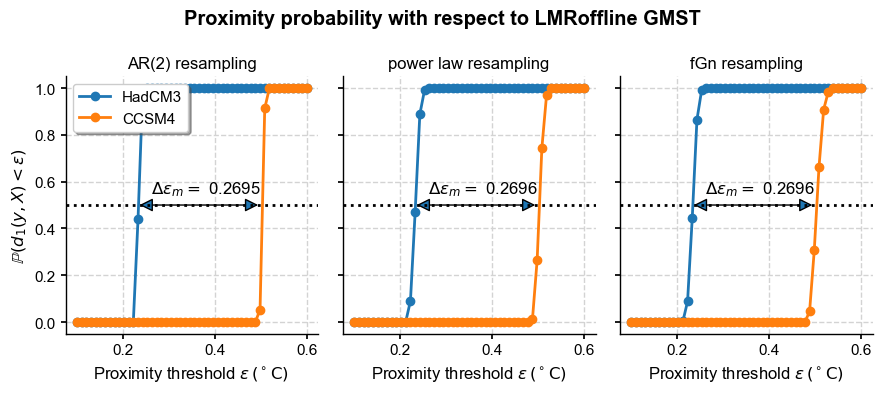

In [24]:
import matplotlib.patches as patches

fig, ax = plt.subplots(1,3, figsize=(9,4), sharey=True)
sampling_style = ['AR(2)', 'power law', 'fGn']
eps_med = np.zeros((len(models),len(sampling_style)))
yr = 0.55
xr = 0.35
for s in range(3):
    for m, mdl in enumerate(models):    
        ax[s].plot(e,LMRoffline_prob[m, s, :],label=mdl,marker='o')
        eps_med[m,s] = find_roots(e, LMRoffline_prob[m, s, :]-0.5)[0]
    eps_diff = eps_med[1,s]-eps_med[0,s]
    ax[s].set_xlabel(r'Proximity threshold $\epsilon \, ({}^\circ \mathrm{C})$ ')
    ax[s].set_title(sampling_style[s] + ' resampling')
    ax[s].axhline(y=0.5,color='k',ls=':')
    ax[s].text(x=xr-.09, y=yr,s=fr'$\Delta \epsilon_m = $ {eps_diff:.4f}')
    pa = patches.FancyArrowPatch((0.23, .5), (0.5, .5), arrowstyle='<|-|>', mutation_scale=20)
    ax[s].add_patch(pa)
ax[0].legend(shadow=True, frameon=True, loc='upper left')
ax[0].set_ylabel(r'$\mathbb{P}(d_1(y,X) < \epsilon)$')
fig.suptitle("Proximity probability with respect to LMRoffline GMST", fontweight = 'bold')
plt.tight_layout()

The behavior is qualitatively similar as with LMRonline, but the phase transitions are a lot more abrupt in those ensembles.  However, the same metric (difference in "median" $\epsilon$ thresholds, $\Delta \epsilon_m$) is amazingly consistent, clocking in at 0.27 degrees!

## Effects of resampling: the Grand Table

### Benchmarks:

In [25]:
N = ens_off.nEns
npairs = int(N*(N-1)/2)
intra_ens_dist = np.empty((4,npairs))
intra_ens_dist[0,:] = ens_o2000.distance()
intra_ens_dist[1,:] = paths_ar.distance()
intra_ens_dist[2,:] = paths_fGn.distance()
intra_ens_dist[3,:] = paths_pl.distance()

Computing intra-ensemble distance among possible pairs: 100%|██████████| 1999000/1999000 [00:05<00:00, 386618.84it/s]
Computing intra-ensemble distance among possible pairs: 100%|██████████| 1999000/1999000 [00:08<00:00, 238406.60it/s]
Computing intra-ensemble distance among possible pairs: 100%|██████████| 1999000/1999000 [00:08<00:00, 240959.27it/s]
Computing intra-ensemble distance among possible pairs: 100%|██████████| 1999000/1999000 [00:08<00:00, 241402.41it/s]


In [26]:
qs = [0.9, 0.95, 0.99]
q95 = np.empty((4,len(qs)))
for i in range(4):
    q95[i,:] = np.quantile(intra_ens_dist[i,:],qs)     
    #print(f'{q95[i,:]:.2f}')

In [27]:
print(q95)

[[0.22003485 0.2600183  0.38735007]
 [0.18273695 0.1843162  0.18728472]
 [0.19221719 0.19662224 0.20528625]
 [0.18989864 0.19360806 0.2009076 ]]


### Plume Distances

In [30]:
common = [1000, 1998] # FGOALS is ruining it for everyone else.
pmip3_plume_dist = np.empty((4,len(ts_list)))
for i, ts in enumerate(ms_pmip.series_list):
    ts_lm = ts.slice(common)
    pmip3_plume_dist[0,i] = ens_on.slice(common).plume_distance(y=ts_lm.value, max_dist=1.5)[0]
    pmip3_plume_dist[1,i] = paths_ar.slice(common).plume_distance(y=ts_lm.value, max_dist=1.5)[0]
    pmip3_plume_dist[2,i] = paths_fGn.slice(common).plume_distance(y=ts_lm.value, max_dist=1.5)[0]
    pmip3_plume_dist[3,i] = paths_pl.slice(common).plume_distance(y=ts_lm.value, max_dist=1.5)[0]
    #print(f'Model {ts.label} has distance {pmip3_plume_dist[0,i]} to LMRonline')
    #print(f'Model {ts.label} has distance {pmip3_plume_dist[1,i]} to LMRv2.1')

Export to LaTeX (bolding could conceivably be automated, for such a simple table it's easier to do it by hand).

In [31]:
df = pd.DataFrame(pmip3_plume_dist,
                  index = ['LMRon','LMRoff, AR(2)', 'LMRoff, fGn', 'LMRoff, $f^{-\beta}$'],
                  columns= dfn.columns[1:])
# add benchmarks
df.insert(0,"$q_{95}",q95[:,1])
# 
print(df.to_latex(formatters={"name": str.upper}, float_format="%.2f"))  

\begin{tabular}{lrrrrrrrrrrr}
\toprule
 & $q_{95} & bcc_csm1_1 & CCSM4 & FGOALS_gl & FGOALS_s2 & IPSL_CM5A_LR & MPI_ESM_P & CSIRO & HadCM3 & CESM & GISS \\
\midrule
LMRon & 0.26 & 0.41 & 0.49 & 0.23 & 0.98 & 0.64 & 0.35 & 0.29 & 0.22 & 0.15 & 0.29 \\
LMRoff, AR(2) & 0.18 & 0.42 & 0.50 & 0.25 & 0.99 & 0.65 & 0.36 & 0.30 & 0.23 & 0.16 & 0.31 \\
LMRoff, fGn & 0.20 & 0.42 & 0.50 & 0.25 & 0.99 & 0.65 & 0.36 & 0.30 & 0.23 & 0.16 & 0.31 \\
LMRoff, $f^{eta}$ & 0.19 & 0.42 & 0.50 & 0.25 & 0.99 & 0.65 & 0.36 & 0.30 & 0.23 & 0.16 & 0.31 \\
\bottomrule
\end{tabular}

